# Python Week 2: Numerical Computation and Vectorized Operations

As scientists, a disproportionate amount of our coding will involve numerical operations and computations. Python's built in data-structures, while serving their own purposes, are not meant to handle the large datasets of most scientists. For this reason we need to turn to two similar but distinct libraries: NumPy and Pandas. These libraries will feel very simialr to the types of datastructures inherent to programming languages like Matlab and R. This is the reason why I tend to favor Python as a language; anything you can do in another language, it can do and better (not always the case but in many cases this can be true).

The last half of this lesson will focus on vectorized operations and optimization lessons.

In [2]:
import pandas as pd
import numpy as np
import time

To start lets examine NumPy, its main contribution is the class "ndarray" (N-dimensional array). This is more commonly referred to as a matrix in mathematical circles. With NumPy we are restricted to numerical data, lets see what it can do below:

In [ ]:
# first lets call the ndarray constructor inherent to NumPy, remember from our last lesson that an ndarray is a
# class, or object, and when we call this class we are creating an instance
# from NumPy's documentation: numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)

empty_array = np.array([])# this array is completely empty, and has no dimensions specified
print(empty_array)
# lets create a 2x2 array now, notice how me make a nested list when hard-coding this array
two_by_two = np.array([[1,2],[3,4]])
print(two_by_two)

type(two_by_two)

In [ ]:
# we can also call stereotyped array constructors that have specific shapes and sizes, this can be useful for 
# pre-allocating memory or when we have a base value so to speak

print(np.empty([2,2]))
print(np.ones([2,2]))
print(np.zeros([2,2]))
print(np.arange(0,100,2.50)) # note Numpy calcualtes this with a half open interval i.e. [0, 100)
print(np.linspace(0,100,num=27))

# a note about np.empty(): this array isn't actually populated with zero's, its actually populated with "pointers"
# or basically coordinates in your memory to random values, do not use np.empty() thinking it'll have the same
# functionality as np.zeros(), you will make computational errors!

(array([ 4.,  4.,  8.,  7.,  8., 10., 10.,  8.,  7.,  5.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

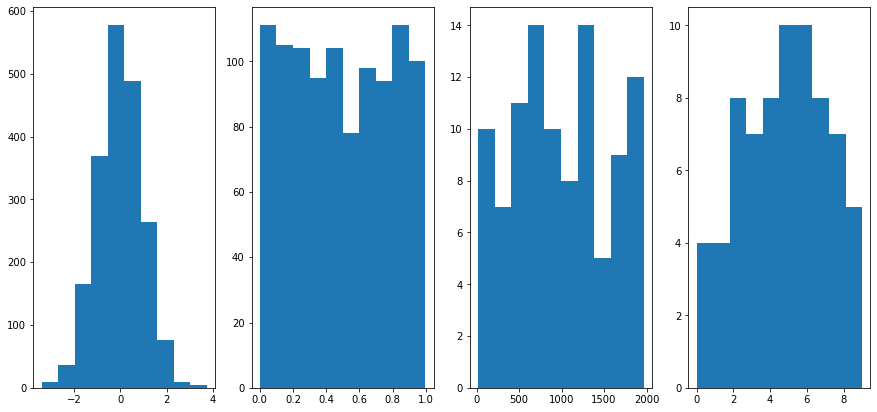

In [3]:
# in some cases we need a collection of random (ok so random numbers in computing are actually determinsitic
# and we can reliably guess their values based on how they are algorithmically generated, thus we can more properly
# call these pseudorandom, for true random numbers we need to take values from true randomly governed events like
# position data on your trackpad. . .) numbers

# in some cases developers leave out specific modules in the broad import statmentsa nd you'll need an accesory
# import statement
from numpy import random
import matplotlib.pyplot as plt
# lets create an array (row vector) of normally distributed numbers
normal_array = random.randn(2000)
# uniformly distibuted numbers 0-1
uniform_array = random.rand(1000)
# pseudorandom integers
int_array = random.randint(2000, size=(100,1))
# plot a new array by my random keystrokes of int from 0-9
ryan_array = np.array([1,6,2,5,7,3,7,4,1,7,9,6,1,8,3,6,9,4,2,6,8,4,2,5,6,8,9,0,8,5,3,2,2,3,5,6,7,8,9,0,6,5,6,8,5,4,1,2,5,3,0,5,3,6,2,4,7,0,7,2,4,7,9,3,5,6,8,4,5,7,4,])

# plot the relative distributions of each as proof of their "randomness"
fig, axs = plt.subplots(1, 4, figsize=(15,7))
axs[0].hist(normal_array)
axs[1].hist(uniform_array)
axs[2].hist(int_array)
axs[3].hist(ryan_array)

# numpy has a lot of different ways to draw numbers from specific distributions like poisson, gamma, etc. this is
# just a few of the msot common ones 

In [ ]:
# indexing and slicy in numpy is fairly simple, as a note however, when you index or slioce an array, you are not
# creating a virutal copy i.e. you are referencing the exact spot in memory that those values habitate

##indexing

# lets create a random array 
random_array = random.randn(10,10)

#a single index will index to the relevant row (remember, NumPy uses [row, column] indices)
print(random_array[1])

# NumPy supports double indexing, so array[m][n] == array[m,n]
print(random_array[1][2] == random_array[1,2])
print(random_array[1][2])

# numpy can index >2 dimensional arrays as well (though i would use a class here to make this simpler)
multi_dim_array = np.array([random_array, random_array, random_array])
print(multi_dim_array[2,3,4])


In [ ]:
##slicing##

# the colon means "all" and can be used to slice
print(random_array[1,:]) # grab all column values in the first row
print(random_array[5:]) # grab fifth index to end of array
print(random_array[:5, :2])# grab until the fifth index

Now lets take a look at the basics of Pandas. Similar ot NumPy, its main claim to fame is adding a new data
structure: the dataframe. As you'll notice however, there is some key differences that set these two libraries apart. Most obviously, Pandas can incorporate non-numerical data, and can even have both numerical and non-numerical entries within the same dataframe. Why is this important? Because I suspect all of us has a collection of spreadsheets that has both numerical and non numerical properties that we would love to be able to manipulate. This is the priamry fucntion of Pandas, to make data wrangling easy. 

In [ ]:
# lets see how we can construct pandas DF's similar to numpy:

# empty df
empty_df = pd.DataFrame()

# from a dictionary
my_dataset = {
  'PI': ["Steve", "Mark", "Ben"],
  'number': [13, 27, 12]
}

my_df = pd.DataFrame(my_dataset)

# from a numpy array
two_by_two = np.array([[1,2],[3,4]])
two_by_two = pd.DataFrame(two_by_two)

# from a csv
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

print(empty_df)
print(my_df)
print(two_by_two)
print(iris)


In [ ]:
# indexing in pandas is somewhat similar to NumPy but remember from last week that it uses column x row indices

# numerical indexing
two_by_two = pd.DataFrame([[1,2],[3,4]])
print(two_by_two[1][0]) # index second column, first row
# pandas does not accept this format two_by_two[1,1]

# index by column 
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print(iris['sepal_length']) 

print(iris.sepal_length == iris['sepal_length'])

# access specific entries in a column
print(iris['sepal_length'][5])

# slicing by ranges (identical to NumPy), when you slice this way pandas slices by row x column
print(iris[:5])
print(iris[100:])


In [ ]:
# pandas has incredibly powerful ways where we can index based 

# lets look at boolean based indexing 
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
v = iris[iris['species'] == 'virginica']
swv = v[v['sepal_width'] > 3.7]
print(swv)

# we can also index based on what our index labels are equivalent to, lets look at a different dataset now
# for this we need the .loc method, as a note we are given a series or new dataframe when we do this i.e. we
# are not accessing the same memory space and are in essence creating a new object
# also not, when we use a number as an index in .loc that treats it as a label, not an index!
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv').transpose()
print(tips.loc['total_bill'])
print(tips.loc[['total_bill','tip']])
print(tips.loc['total_bill'] > 12.76)

# we can also index numerically in pandas when we want to ignore the labels, this does row indexing!
print(tips.iloc[1])
print(tips.iloc[[1,2,3]])
print(tips.iloc[:3])



To finish off today we are going to talk about vector operations and optimization of code. Remember, python is interpreted thus it is inherently slower than compiled languages, but we can use certain practices to speed up our code. To start lets look at the differences between NumPy and Pandas.

In [ ]:
from numpy import random
np_array = random.randn(20,20)
pd_array = pd.DataFrame(np_array)

# time how long it takes to calculate the mean of a NumPy array
start_time = time.time()

np.mean(np_array)

end_time = time.time()

np_ti = end_time - start_time

# time how long it takes to calculate the speed of a Pandas DataFrame
start_time1 = time.time()

pd_array.mean()

end_time1 = time.time()

pd_ti = end_time1 - start_time1

print(f'It took Numpy {np_ti} second(s) to run, and Pandas {pd_ti} second(s) to run, or NumPy was {pd_ti / np_ti}x faster!')

# so obviosuly these two operations are both incredibly fast, but note that NumPy is faster for numerical operations,
# also note that this relationship is not linear! Thus try to perform numerical operations in NumPy when possible!

In [ ]:
# vectorized operatiosn should always be used as they will 99.999999% of the time be faster than for-loop operations
# this is because modern computing hardware is designed to perform these types of calcualtions with ease
# if you're coming from matlab and R these are the main operations by which these languages operate
# this occurs because in for loops you apply a fucntion over each and every entry, but in vectorized operations 
# you apply a fucntion once, and they are written in C/C++ generally
start_time = time.time()
np.sum(np.arange(100000))
end_time = time.time()
vector_time = end_time - start_time

start_time1 = time.time()
total = 0
for i in np.arange(100000):
    total = i + total
end_time1 = time.time()
for_time = end_time1 - start_time1

print(f'Vector operations are {for_time / vector_time}x faster!')


In [ ]:
# lets take a look at how vectorized operations in Pandas are better
myDF = pd.DataFrame(random.randn(1000))

# pd.apply() applies a function iteratively row or column wise across a pandas object
start_time = time.time()
myDF.apply(lambda x: x**2)
end_time = time.time()
apply_time = end_time - start_time

start_time1 = time.time()
myDF**2
end_time1 = time.time()

vector_time = end_time1 - start_time1

print(f'Vector operations are {apply_time / vector_time}x faster!')